In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = "/content/drive/MyDrive/datos2.csv"
df1 = pd.read_csv(ruta)

<ipython-input-5-7092dc7108f3>:2: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(ruta)


In [ ]:
ruta2 = "/content/drive/MyDrive/df_modelo_final.csv"
df_modelo_final = pd.read_csv(ruta2)

In [ ]:
df["fechaEnvioCobro"] = pd.to_datetime(df["fechaEnvioCobro"], errors="coerce")


In [ ]:
df.info()
# Verificar nulos y tipos
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())


In [ ]:
df["tasa_efectividad"] = df["montoCobrado"] / df["montoCobrar"]
print("Tasa promedio de efectividad: ", df["tasa_efectividad"].mean())


In [ ]:
# Convertir fechas completas a datetime
df["fechaAperturaCredito"] = pd.to_datetime(df["fechaAperturaCredito"], errors='coerce')
df["fechaCobroBanco"] = pd.to_datetime(df["fechaCobroBanco"], errors='coerce')
df["fechaCreacionLista"] = pd.to_datetime(df["fechaCreacionLista"], errors='coerce')

# Convertir hora sola (en formato HH:MM o HH:MM:SS) a tipo datetime.time
df["horaCreacionLista"] = pd.to_datetime(df["horaCreacionLista"], format='%H:%M:%S', errors='coerce').dt.time


In [ ]:
df["diaCobro"] = df["fechaCobroBanco"].dt.dayofweek

sns.boxplot(x="diaCobro", y="tasa_efectividad", data=df)
plt.title("Tasa de efectividad por día de la semana")
plt.show()


In [ ]:
outliers = df[df["tasa_efectividad"] > 1]

# Muestra los valores extremos
print(outliers[["idCredito", "fechaCobroBanco", "montoCobrado", "montoCobrar", "tasa_efectividad", "diaCobro"]])

In [ ]:
outliers = df[df["tasa_efectividad"] > 1]
print("Número de outliers:", outliers.shape[0])


In [ ]:
df[(df["idCredito"] == 691944) & (df["montoCobrar"] < df["montoCobrado"])]



In [ ]:
df

In [ ]:
df = df[df["tasa_efectividad"] <= 1]


In [ ]:
banco_efectividad = df.groupby("idBanco")["tasa_efectividad"].mean().sort_values()
banco_efectividad.plot(kind='bar', title="Efectividad promedio por banco")
plt.show()

emisora_efectividad = df.groupby("idEmisora")["tasa_efectividad"].mean().sort_values()
emisora_efectividad.plot(kind='bar', title="Efectividad promedio por emisora")
plt.show()


<ipython-input-15-8db17d2cc8e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mesApertura"] = df["fechaAperturaCredito"].dt.to_period("M")


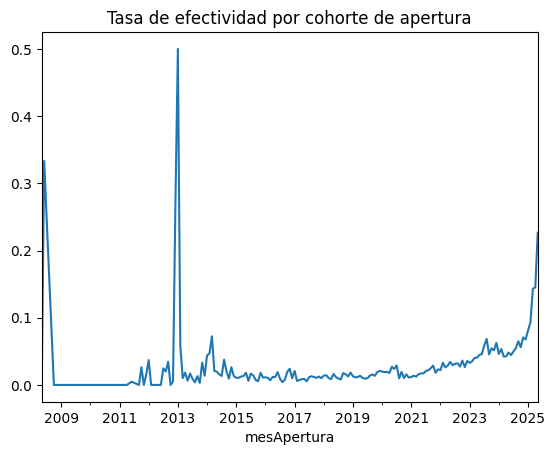

In [ ]:
df["mesApertura"] = df["fechaAperturaCredito"].dt.to_period("M")
cohortes = df.groupby("mesApertura")["tasa_efectividad"].mean()
cohortes.plot(title="Tasa de efectividad por cohorte de apertura")
plt.show()



In [ ]:
df_copia = df.copy()
# Convertir todo a texto y limpiar espacios
df_copia["idRespuestaBanco"] = df_copia["idRespuestaBanco"].astype(str).str.strip()

# Contar valores únicos y ordenarlos
respuesta_counts = df_copia["idRespuestaBanco"].value_counts().sort_index()

# Mostrar resultado
print(respuesta_counts)


idRespuestaBanco
0.0         275321
00           18582
01             358
02             865
03             960
04          492779
08            4973
1.0           5087
10               8
10.0            29
13            1149
13.0         33864
18.0             5
19              23
19.0           205
2.0           9090
26            2290
26.0         14859
3.0           6175
30             579
30.0          1473
36               5
36.0          1343
37.0             1
4.0        8981402
40               5
40.0           312
42               5
42.0            37
53               1
6.0              2
8.0           8374
83               1
84.0             7
88               7
88.0            64
DD00020       3411
DD00021       1542
DD00028       1824
DD00031      40128
DD00033         82
DD00041         87
DD00042          6
INC16          267
INC9           292
nan         149561
Name: count, dtype: int64


In [ ]:
# Convertir todos los valores a string, eliminar espacios
df_copia["idRespuestaBanco"] = df_copia["idRespuestaBanco"].astype(str).str.strip()

# Convertir valores como '04', '4.0', '8.0' → '4', '8' eliminando ceros y punto decimal
def limpiar_respuesta(valor):
    if valor.lower() == 'nan':
        return "NaN"
    try:
        # Si es número (incluyendo float con .0), conviértelo a entero y a string
        return str(int(float(valor)))
    except:
        # Si no se puede convertir, mantener como texto (ej: "DD00031")
        return valor

df_copia["idRespuestaBanco_limpio"] = df_copia["idRespuestaBanco"].apply(limpiar_respuesta)


In [ ]:
respuesta_counts = df_copia["idRespuestaBanco_limpio"].value_counts()
print(respuesta_counts.head(20))


idRespuestaBanco_limpio
4          9474181
0           293903
NaN         149561
DD00031      40128
13           35013
26           17149
8            13347
2             9955
3             7135
1             5445
DD00020       3411
30            2052
DD00028       1824
DD00021       1542
36            1348
40             317
INC9           292
INC16          267
19             228
DD00041         87
Name: count, dtype: int64


In [ ]:
df_copia[df_copia["idRespuestaBanco_limpio"] == "NaN"]["idBanco"].value_counts()


,count
idBanco,
72,67630
14,5079
12,4784
2,1191


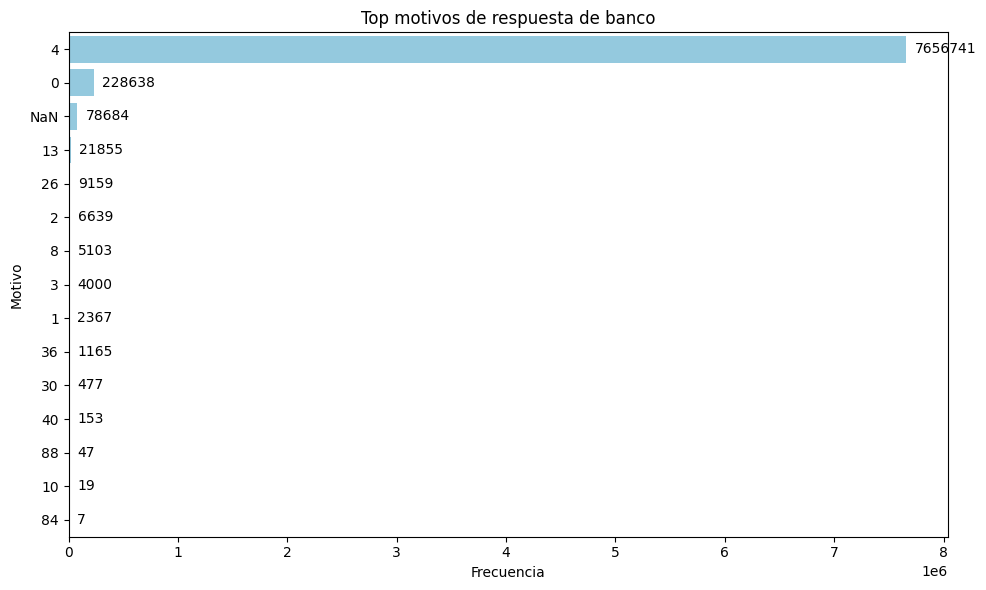

In [ ]:
# Preparar los datos
respuesta_counts = df_copia["idRespuestaBanco_limpio"].value_counts().head(15)
data_plot = respuesta_counts.reset_index()
data_plot.columns = ["Motivo", "Frecuencia"]

# Crear gráfica
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Frecuencia", y="Motivo", data=data_plot, color="skyblue")

# Agregar etiquetas con el conteo encima de cada barra
for i, (valor, motivo) in enumerate(zip(data_plot["Frecuencia"], data_plot["Motivo"])):
    ax.text(valor + max(data_plot["Frecuencia"]) * 0.01, i, str(valor), va='center')

plt.title("Top motivos de respuesta de banco")
plt.xlabel("Frecuencia")
plt.ylabel("Motivo")
plt.tight_layout()
plt.show()


In [ ]:
(df_copia["idRespuestaBanco_limpio"] == "8").sum()




np.int64(5103)

In [ ]:
# Crear la columna de porcentaje
data_plot["Porcentaje"] = data_plot["Frecuencia"] / data_plot["Frecuencia"].sum()


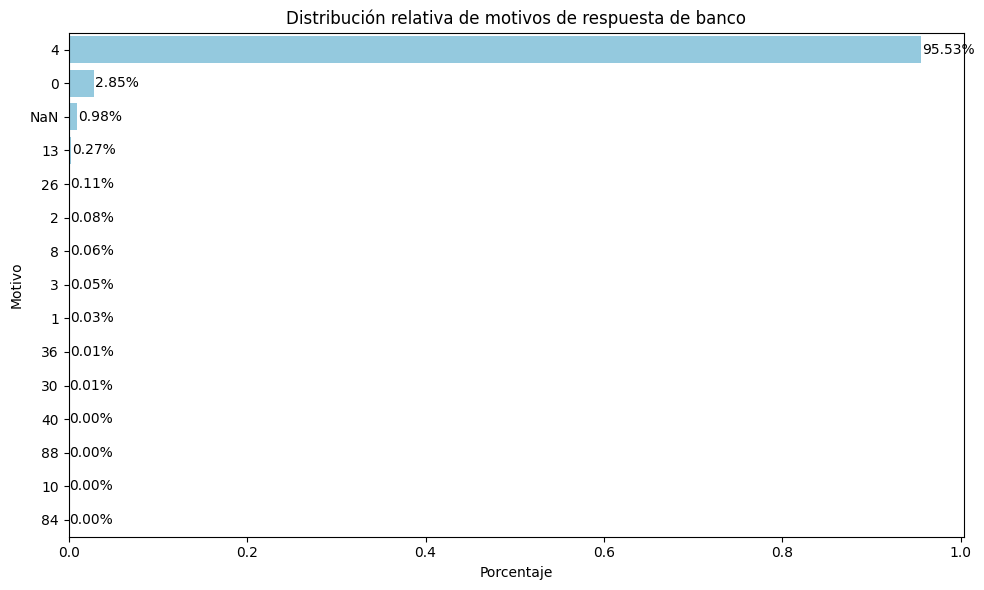

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Porcentaje", y="Motivo", data=data_plot, color="skyblue")

# Etiquetas de porcentaje encima
for i, (valor, motivo) in enumerate(zip(data_plot["Porcentaje"], data_plot["Motivo"])):
    ax.text(valor + 0.001, i, f"{valor:.2%}", va='center')

plt.title("Distribución relativa de motivos de respuesta de banco")
plt.xlabel("Porcentaje")
plt.ylabel("Motivo")
plt.tight_layout()
plt.show()


In [ ]:
df[df["idRespuestaBanco"].isna()]


,Unnamed: 0,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,...,TipoEnvio,Costo,TiempoRespuesta,TiempoBusqueda,pagare,capital,fechaAperturaCredito,tasa_efectividad,diaCobro,mesApertura
2064156,2064156,139389,623689,35554108,72,2738.83,2738.83,2738.83,2024-06-03,NaN,...,TRADICIONAL,2.5,1440.0,11520.0,142419.16,70000.0,2022-05-20,1.0,0.0,2022-05
2064157,2064157,139389,631282,35554109,72,2738.83,2738.83,2738.83,2024-07-03,NaN,...,TRADICIONAL,2.5,1440.0,11520.0,142419.16,70000.0,2022-08-02,1.0,2.0,2022-08
2064158,2064158,139389,654210,35554112,72,2738.83,2738.83,2738.83,2024-07-03,NaN,...,TRADICIONAL,2.5,1440.0,11520.0,142419.16,70000.0,2023-03-27,1.0,2.0,2023-03
2064159,2064159,139389,659105,35554111,72,1956.31,1956.31,1956.31,2024-06-03,NaN,...,TRADICIONAL,2.5,1440.0,11520.0,101728.12,50000.0,2023-05-02,1.0,0.0,2023-05
2064162,2064162,139389,688140,35554113,72,1173.78,1173.78,1173.78,2024-06-03,NaN,...,TRADICIONAL,2.5,1440.0,11520.0,61036.56,30000.0,2023-12-09,1.0,0.0,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054928,10054928,162220,466479,44281079,12,782.53,782.53,0.00,NaT,NaN,...,TRADICIONAL,8.0,1440.0,8640.0,81382.60,40000.0,2018-12-05,0.0,NaN,2018-12
10054929,10054929,162220,475597,44281082,12,375.50,375.50,0.00,NaT,NaN,...,TRADICIONAL,8.0,1440.0,8640.0,39050.97,15428.0,2019-02-25,0.0,NaN,2019-02
10054930,10054930,162220,481269,44281080,12,782.53,782.53,0.00,NaT,NaN,...,TRADICIONAL,8.0,1440.0,8640.0,81382.60,40000.0,2019-03-30,0.0,NaN,2019-03
10054931,10054931,162220,482633,44281084,12,527.17,527.17,0.00,NaT,NaN,...,TRADICIONAL,8.0,1440.0,8640.0,54825.68,21660.0,2019-04-09,0.0,NaN,2019-04


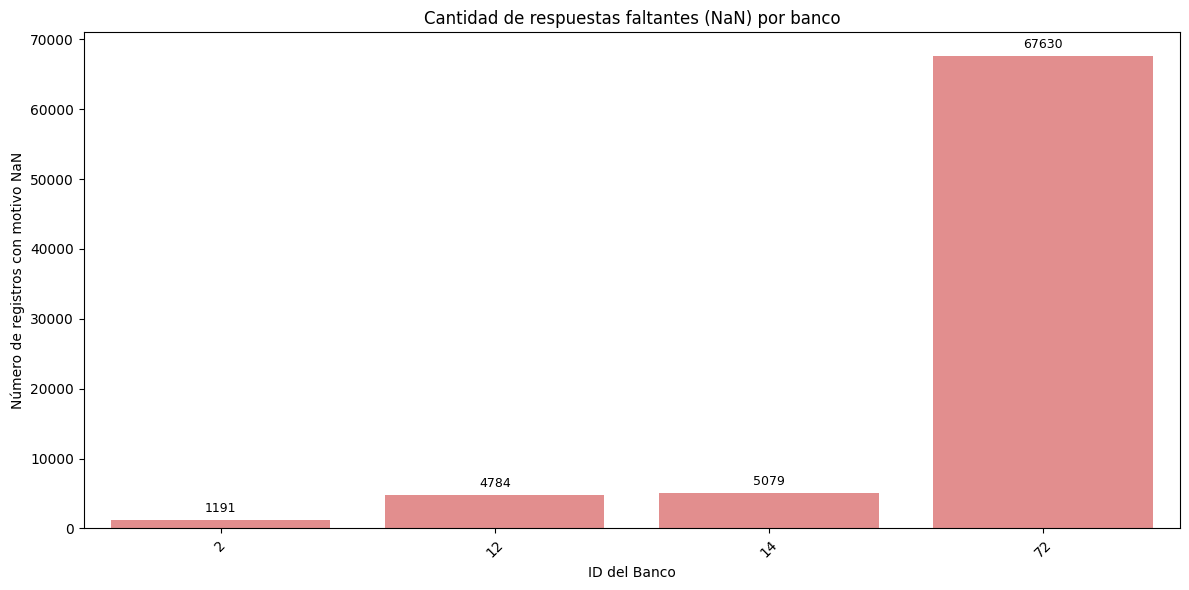

In [ ]:
# Paso 1: Filtrar registros con NaN en respuesta
nan_respuestas = df_copia[df_copia["idRespuestaBanco_limpio"] == "NaN"]

# Paso 2: Contar por idBanco
banco_nan_counts = nan_respuestas["idBanco"].value_counts().reset_index()
banco_nan_counts.columns = ["idBanco", "Frecuencia"]
banco_nan_counts = banco_nan_counts.sort_values(by="Frecuencia", ascending=False)

# Crear gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="idBanco", y="Frecuencia", data=banco_nan_counts, color="lightcoral")

# Agregar etiquetas encima de cada barra
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax.text(x, height + banco_nan_counts["Frecuencia"].max()*0.01, f"{int(height)}",
            ha='center', va='bottom', fontsize=9)

# Ajustes de estilo
plt.title("Cantidad de respuestas faltantes (NaN) por banco")
plt.xlabel("ID del Banco")
plt.ylabel("Número de registros con motivo NaN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


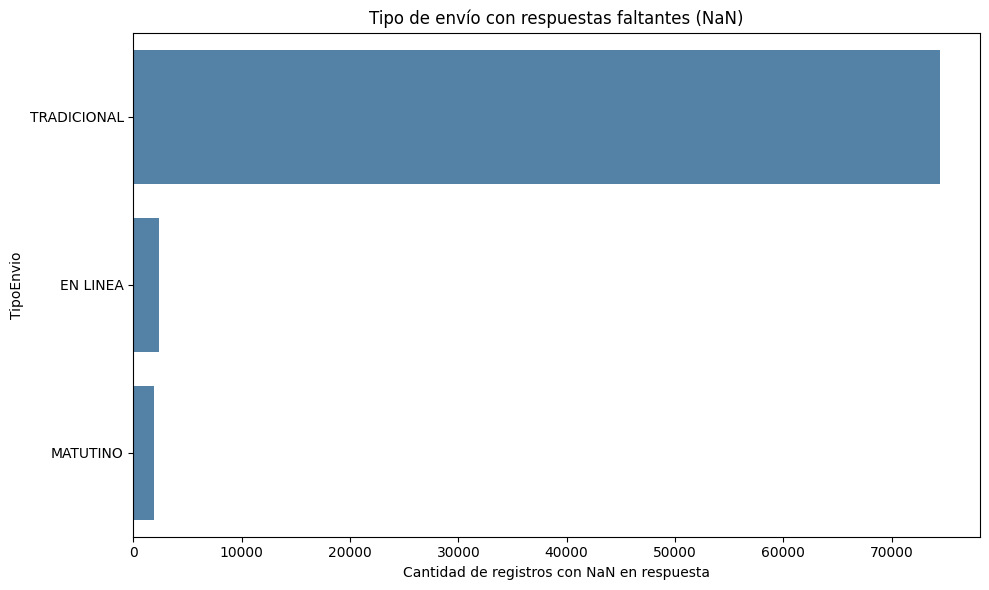

In [ ]:
# Contar por tipo de envío entre los que tienen respuesta NaN
envio_nan_counts = nan_respuestas["TipoEnvio"].value_counts().reset_index()
envio_nan_counts.columns = ["TipoEnvio", "Frecuencia"]

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x="Frecuencia", y="TipoEnvio", data=envio_nan_counts, color="steelblue")
plt.title("Tipo de envío con respuestas faltantes (NaN)")
plt.xlabel("Cantidad de registros con NaN en respuesta")
plt.ylabel("TipoEnvio")
plt.tight_layout()
plt.show()


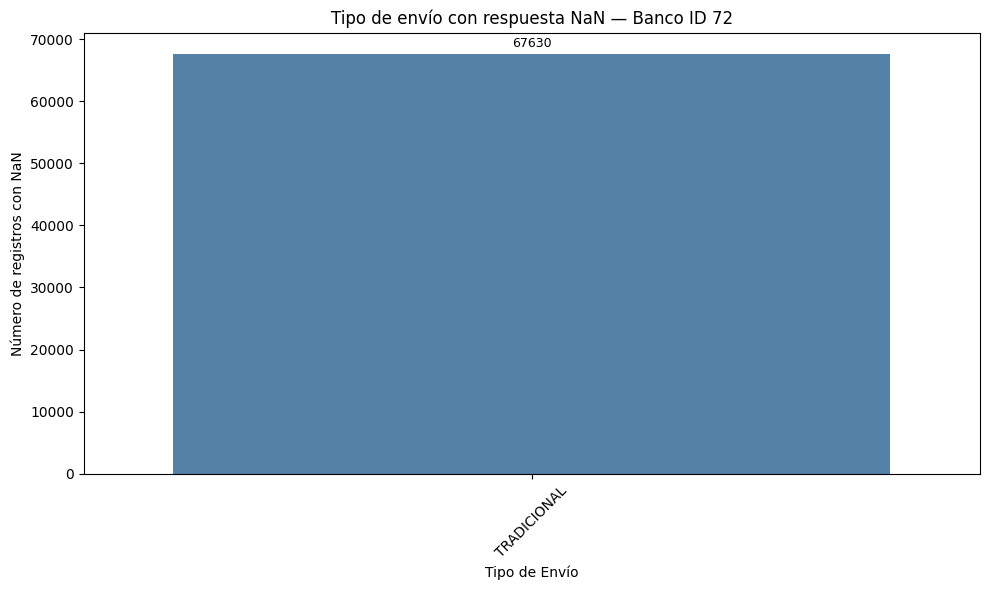

In [ ]:
nan_banco72 = df_copia[
    (df_copia["idRespuestaBanco_limpio"] == "NaN") &
    (df_copia["idBanco"] == 72)
]
envio_nan_counts = nan_banco72["TipoEnvio"].value_counts().reset_index()
envio_nan_counts.columns = ["TipoEnvio", "Frecuencia"]
envio_nan_counts = envio_nan_counts.sort_values(by="Frecuencia", ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="TipoEnvio", y="Frecuencia", data=envio_nan_counts, color="steelblue")

# Agregar etiquetas con el valor encima de cada barra
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax.text(x, height + envio_nan_counts["Frecuencia"].max()*0.01,
            f"{int(height)}", ha='center', va='bottom', fontsize=9)

# Título y estilo
plt.title("Tipo de envío con respuesta NaN — Banco ID 72")
plt.xlabel("Tipo de Envío")
plt.ylabel("Número de registros con NaN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
banco_counts = df_copia["idBanco"].value_counts().reset_index()
banco_counts.columns = ["idBanco", "TotalRegistros"]
banco_counts = banco_counts.sort_values(by="TotalRegistros", ascending=False)

print(banco_counts)


    idBanco  TotalRegistros
0        12         4680845
1         2         2643753
2        14          318893
3        72          243855
4        21          105987
5       127           10269
6        44            5761
7        62            3634
8       137             766
9        30             582
10       58             288
11       36             225
12      166              80
13      132              69
14      131              53


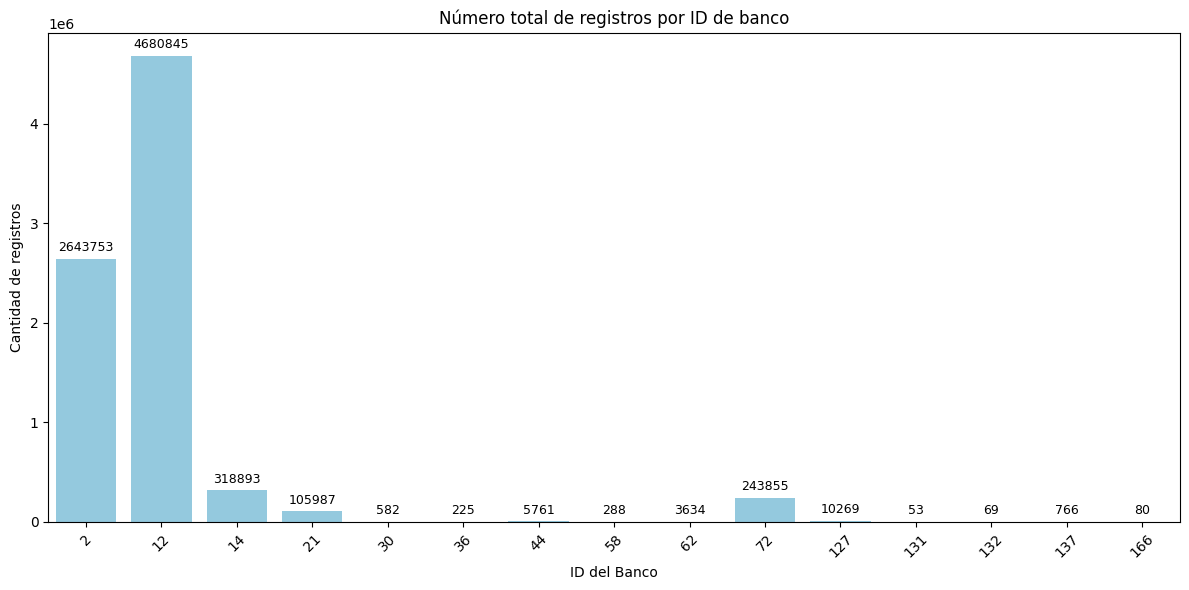

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="idBanco", y="TotalRegistros", data=banco_counts, color="skyblue")

# Agregar etiquetas con el valor encima de cada barra
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax.text(x, height + banco_counts["TotalRegistros"].max()*0.01,
            f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.title("Número total de registros por ID de banco")
plt.xlabel("ID del Banco")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Costo por monto cobrado
df["costo_unitario"] = df["Costo"] / df["montoCobrado"].replace(0, pd.NA)
df_valid = df[df["montoCobrado"] > 0]


<ipython-input-30-f8d37a6f0cc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["costo_unitario"] = df["Costo"] / df["montoCobrado"].replace(0, pd.NA)


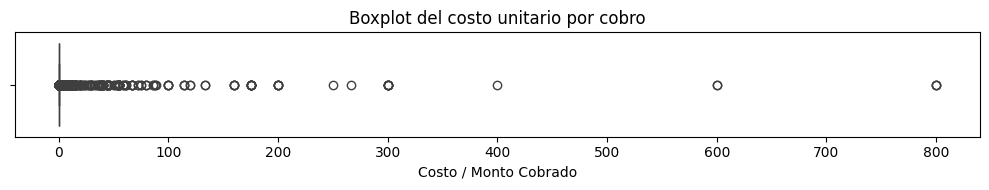

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df["costo_unitario"])
plt.title("Boxplot del costo unitario por cobro")
plt.xlabel("Costo / Monto Cobrado")
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df["costo_unitario"].quantile(0.25)
Q3 = df["costo_unitario"].quantile(0.75)
IQR = Q3 - Q1

# Límite superior para considerar un valor outlier
limite_superior = Q3 + 1.5 * IQR


In [ ]:
outliers = df[df["costo_unitario"] > limite_superior]


In [ ]:
outliers[["idCredito", "Costo", "montoCobrado", "costo_unitario", "idBanco", "TipoEnvio"]].sort_values(by="costo_unitario", ascending=False).head(10)


,idCredito,Costo,montoCobrado,costo_unitario,idBanco,TipoEnvio
9129896,692088,8.0,0.01,800.0,12,TRADICIONAL
9130452,729645,8.0,0.01,800.0,12,TRADICIONAL
9130456,729744,8.0,0.01,800.0,12,TRADICIONAL
9142947,731653,6.0,0.01,600.0,21,INTERBANCARIO
9141107,612231,6.0,0.01,600.0,21,INTERBANCARIO
9130352,721114,8.0,0.02,400.0,12,TRADICIONAL
9142791,723346,6.0,0.02,300.0,21,INTERBANCARIO
9141562,657187,6.0,0.02,300.0,21,INTERBANCARIO
9142774,722936,6.0,0.02,300.0,21,INTERBANCARIO
9142741,721433,6.0,0.02,300.0,21,INTERBANCARIO


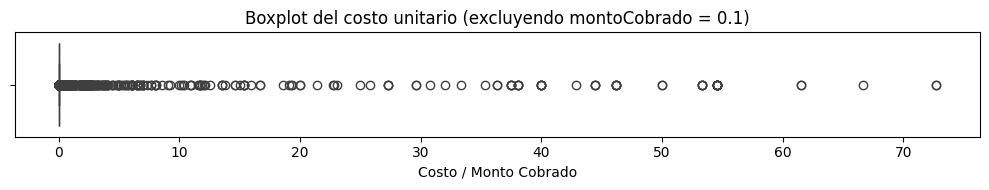

In [ ]:
# Filtrar registros que NO son de cobros simbólicos (mayores a $.10)
df_filtrado = df[df["montoCobrado"] > 0.1].copy()

# Recalcular costo unitario para los registros válidos
df_filtrado["costo_unitario"] = df_filtrado["Costo"] / df_filtrado["montoCobrado"]

# Graficar boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_filtrado["costo_unitario"])
plt.title("Boxplot del costo unitario (excluyendo montoCobrado = 0.1)")
plt.xlabel("Costo / Monto Cobrado")
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df_filtrado["costo_unitario"].quantile(0.25)
Q3 = df_filtrado["costo_unitario"].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_costo_unitario = df_filtrado[df_filtrado["costo_unitario"] > limite_superior]
outliers_costo_unitario[[
    "idCredito", "Costo", "montoCobrado", "costo_unitario", "idBanco", "TipoEnvio"
]].sort_values(by="costo_unitario", ascending=False).head(10)


,idCredito,Costo,montoCobrado,costo_unitario,idBanco,TipoEnvio
9129607,684607,8.0,0.11,72.727273,12,TRADICIONAL
9129618,684935,8.0,0.11,72.727273,12,TRADICIONAL
9129345,660048,8.0,0.12,66.666667,12,TRADICIONAL
9129994,702173,8.0,0.13,61.538462,12,TRADICIONAL
9130014,702895,8.0,0.13,61.538462,12,TRADICIONAL
9142390,707752,6.0,0.11,54.545455,21,INTERBANCARIO
9141850,684274,6.0,0.11,54.545455,21,INTERBANCARIO
9142411,708210,6.0,0.11,54.545455,21,INTERBANCARIO
9141903,685128,6.0,0.11,54.545455,21,INTERBANCARIO
9141987,687202,6.0,0.11,54.545455,21,INTERBANCARIO


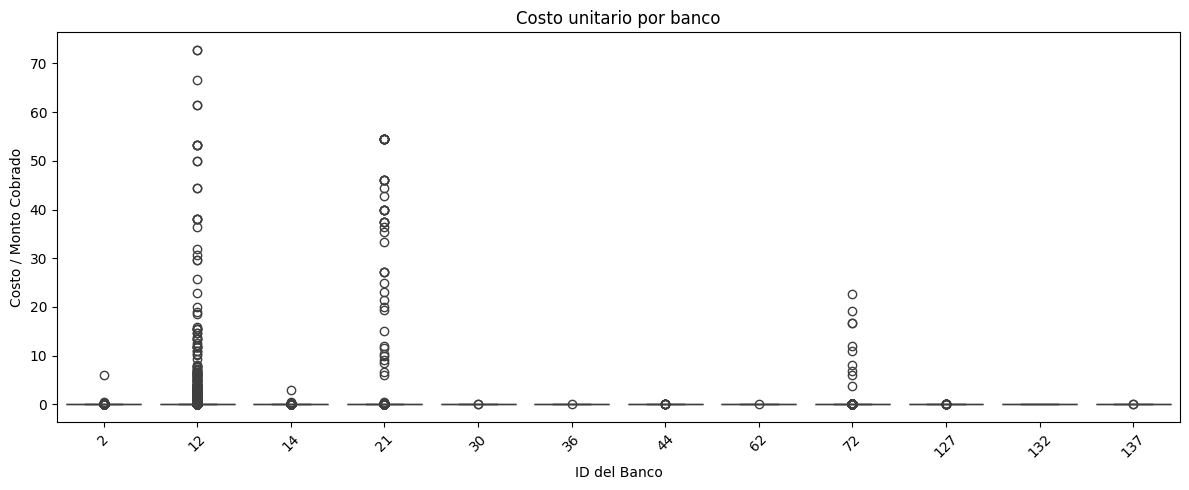

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="idBanco", y="costo_unitario", data=df_filtrado)
plt.title("Costo unitario por banco")
plt.xlabel("ID del Banco")
plt.ylabel("Costo / Monto Cobrado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


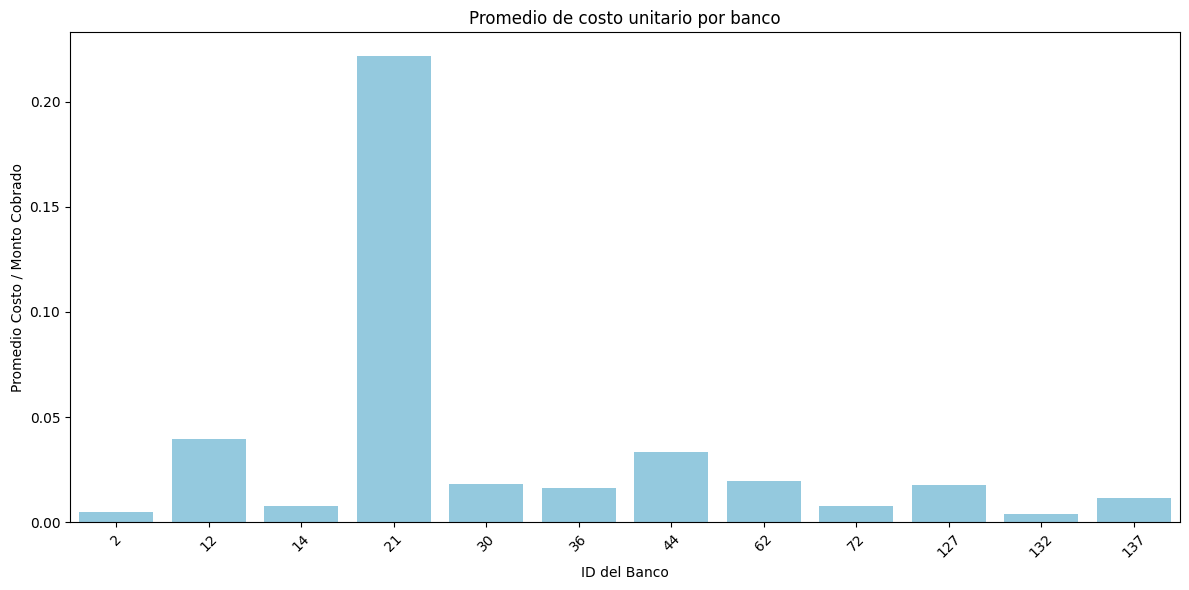

In [ ]:
promedio_bancos = df_filtrado.groupby("idBanco")["costo_unitario"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="idBanco", y="costo_unitario", data=promedio_bancos, color="skyblue")
plt.title("Promedio de costo unitario por banco")
plt.xlabel("ID del Banco")
plt.ylabel("Promedio Costo / Monto Cobrado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


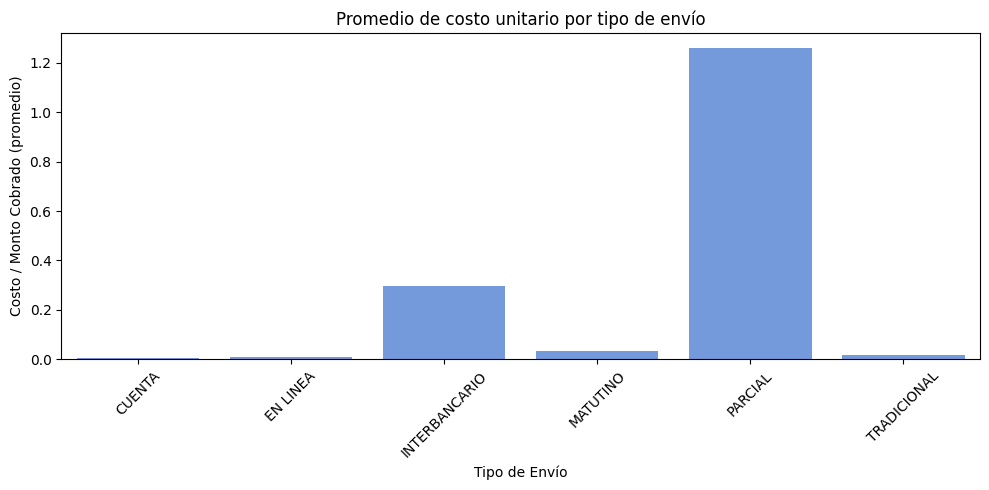

In [ ]:
promedio_envio = df_filtrado.groupby("TipoEnvio")["costo_unitario"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x="TipoEnvio", y="costo_unitario", data=promedio_envio, color="cornflowerblue")
plt.title("Promedio de costo unitario por tipo de envío")
plt.xlabel("Tipo de Envío")
plt.ylabel("Costo / Monto Cobrado (promedio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df["fechaEnvioCobro"] = pd.to_datetime(df["fechaEnvioCobro"], errors='coerce')
df["mesCobro"] = df["fechaEnvioCobro"].dt.to_period("M")


<ipython-input-43-f38a5b6beed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fechaEnvioCobro"] = pd.to_datetime(df["fechaEnvioCobro"], errors='coerce')
<ipython-input-43-f38a5b6beed4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mesCobro"] = df["fechaEnvioCobro"].dt.to_period("M")


<ipython-input-44-f12d09248403>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mesCobro"] = df["fechaEnvioCobro"].dt.to_period("M")


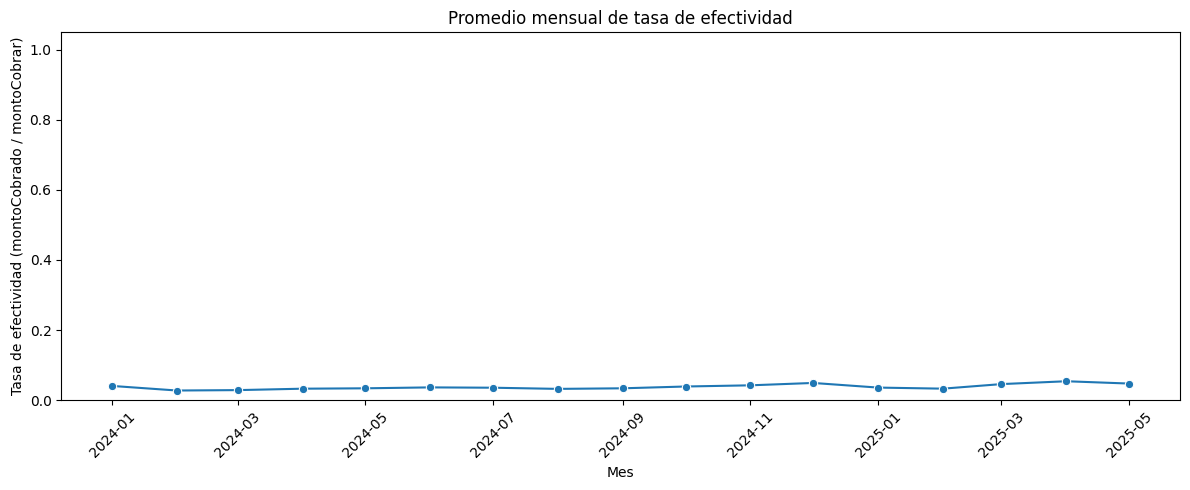

In [ ]:
# Crear columna de mes
df["mesCobro"] = df["fechaEnvioCobro"].dt.to_period("M")

# Calcular el promedio mensual de tasa_efectividad
promedio_mensual = df.groupby("mesCobro")["tasa_efectividad"].mean().reset_index()

# Convertir a timestamp para graficar
promedio_mensual["mesCobro"] = promedio_mensual["mesCobro"].dt.to_timestamp()

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(data=promedio_mensual, x="mesCobro", y="tasa_efectividad", marker="o")
plt.title("Promedio mensual de tasa de efectividad")
plt.xlabel("Mes")
plt.ylabel("Tasa de efectividad (montoCobrado / montoCobrar)")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


#Clusterización

In [ ]:
df_ordenado = df_copia.copy()
df_ordenado["fechaEnvioCobro"] = pd.to_datetime(df_ordenado["fechaEnvioCobro"], errors="coerce")

# Ordenar por cliente y fecha
df_ordenado = df_ordenado.sort_values(by=["idCredito", "fechaEnvioCobro"])


In [ ]:
# Cobros exitosos
df_ordenado["es_exito"] = df_ordenado["montoCobrado"] > 0

# Para cada cliente, crear grupo acumulativo de pagos: se incrementa cada vez que hay éxito
df_ordenado["bloque_pago"] = df_ordenado.groupby("idCredito")["es_exito"].cumsum()


In [ ]:
# Dentro de cada bloque antes de un cobro, contar cuántos fallos hubo
intentos_por_bloque = df_ordenado.groupby(["idCredito", "bloque_pago"]).apply(
    lambda g: g.loc[g["montoCobrado"] == 0].shape[0]
).reset_index(name="intentos_antes_pago")


<ipython-input-14-d78b0222cbfc>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  intentos_por_bloque = df_ordenado.groupby(["idCredito", "bloque_pago"]).apply(


In [ ]:
promedios_intentos = intentos_por_bloque.groupby("idCredito")["intentos_antes_pago"].mean().reset_index()
promedios_intentos.rename(columns={"intentos_antes_pago": "promedio_intentos_por_pago"}, inplace=True)


In [ ]:
resumen_credito = df_ordenado.groupby("idCredito").agg(
    total_exigible=("montoCobrar", "max"),
    total_cobrado=("montoCobrado", "sum"),
    banco_principal=("idBanco", lambda x: x.mode()[0] if not x.mode().empty else None),
    primer_fecha_cobro=("fechaEnvioCobro", "min"),
    ultima_fecha_cobro=("fechaEnvioCobro", "max")
).reset_index()


In [ ]:
resumen_credito["tasa_recuperacion"] = resumen_credito["total_cobrado"] / resumen_credito["total_exigible"]
resumen_credito["duracion_dias"] = (resumen_credito["ultima_fecha_cobro"] - resumen_credito["primer_fecha_cobro"]).dt.days


In [ ]:
# Crear columna mes
df_ordenado["mes"] = df_ordenado["fechaEnvioCobro"].dt.to_period("M")
df_ordenado["es_fallo"] = df_ordenado["montoCobrado"] == 0

fallos_mes = df_ordenado[df_ordenado["es_fallo"]].groupby(["idCredito", "mes"]).size().reset_index(name="fallos_mes")
max_fallos = fallos_mes.groupby("idCredito")["fallos_mes"].max().reset_index()
max_fallos.rename(columns={"fallos_mes": "intentos_maximos_mes"}, inplace=True)


In [ ]:
# Combinar todo
df_cluster = resumen_credito.merge(promedios_intentos, on="idCredito", how="left")
df_cluster = df_cluster.merge(max_fallos, on="idCredito", how="left")

# Rellenar valores faltantes si hay clientes sin cobros
df_cluster["promedio_intentos_por_pago"] = df_cluster["promedio_intentos_por_pago"].fillna(0)
df_cluster["intentos_maximos_mes"] = df_cluster["intentos_maximos_mes"].fillna(0).astype(int)


In [ ]:
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97230 entries, 0 to 97229
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   idCredito                   97230 non-null  int64         
 1   total_exigible              97230 non-null  float64       
 2   total_cobrado               97230 non-null  float64       
 3   banco_principal             97230 non-null  int64         
 4   primer_fecha_cobro          97230 non-null  datetime64[ns]
 5   ultima_fecha_cobro          97230 non-null  datetime64[ns]
 6   tasa_recuperacion           97230 non-null  float64       
 7   duracion_dias               97230 non-null  int64         
 8   promedio_intentos_por_pago  97230 non-null  float64       
 9   intentos_maximos_mes        97230 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4)
memory usage: 7.4 MB


In [ ]:
df_cluster.to_csv("df_cluster.csv", index=False)


In [ ]:
from google.colab import files
files.download("df_cluster.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df[df["idCredito"] == 4635][[
    "idCredito", "consecutivoCobro", "idBanco", "montoExigible", "montoCobrar", "montoCobrado",
    "fechaCobroBanco", "idRespuestaBanco_limpio", "idBanco_y", "fechaEnvioCobro", "idEmisora",
    "Costo", "TiempoRespuesta", "TiempoBusqueda", "pagare", "capital",
    "fechaAperturaCredito", "tasa_efectividad"
]]



KeyError: "['idRespuestaBanco_limpio', 'tasa_efectividad'] not in index"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10057440 entries, 0 to 10057439
Data columns (total 27 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   idListaCobro          int64         
 2   idCredito             int64         
 3   consecutivoCobro      int64         
 4   idBanco               int64         
 5   montoExigible         float64       
 6   montoCobrar           float64       
 7   montoCobrado          float64       
 8   fechaCobroBanco       datetime64[ns]
 9   idRespuestaBanco      object        
 10  fechaCreacionLista    datetime64[ns]
 11  idBanco_y             int64         
 12  fechaEnvioCobro       datetime64[ns]
 13  idEmisora             int64         
 14  horaCreacionLista     datetime64[ns]
 15  Descripcion           object        
 16  Nombre                object        
 17  Emisora               object        
 18  TipoEnvio             object        
 19

In [ ]:
respuesta_moda = df_copia.groupby("idCredito")["idRespuestaBanco"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
respuesta_moda.rename(columns={"idRespuestaBanco": "respuesta_moda"}, inplace=True)


In [ ]:
emisora_moda = df_copia.groupby("idCredito")["idEmisora"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
emisora_moda.rename(columns={"idEmisora": "emisora_moda"}, inplace=True)


In [ ]:
otros_vars = df.groupby("idCredito").agg({
    "pagare": "first",
    "capital": "first"
}).reset_index()


In [ ]:
df_cluster = df_cluster.merge(respuesta_moda, on="idCredito", how="left")
df_cluster = df_cluster.merge(emisora_moda, on="idCredito", how="left")
df_cluster = df_cluster.merge(otros_vars, on="idCredito", how="left")


In [ ]:
df_cluster = pd.get_dummies(df_cluster, columns=["respuesta_moda", "emisora_moda"], drop_first=True)


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97230 entries, 0 to 97229
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   idCredito                   97230 non-null  int64         
 1   total_exigible              97230 non-null  float64       
 2   total_cobrado               97230 non-null  float64       
 3   banco_principal             97230 non-null  int64         
 4   primer_fecha_cobro          97230 non-null  datetime64[ns]
 5   ultima_fecha_cobro          97230 non-null  datetime64[ns]
 6   tasa_recuperacion           97230 non-null  float64       
 7   duracion_dias               97230 non-null  int64         
 8   promedio_intentos_por_pago  97230 non-null  float64       
 9   intentos_maximos_mes        97230 non-null  int64         
 10  pagare                      97228 non-null  float64       
 11  capital                     97228 non-null  float64   

In [ ]:
df_cluster.to_csv("df_cluster.csv", index=False)


In [ ]:
from google.colab import files
files.download("df_cluster.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cluster["duracion_dias"] = (
    df_cluster["ultima_fecha_cobro"] - df_cluster["primer_fecha_cobro"]
).dt.days


In [ ]:
df_cluster

,idCredito,total_exigible,total_cobrado,banco_principal,primer_fecha_cobro,ultima_fecha_cobro,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,...,emisora_moda_34,emisora_moda_36,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79
0,6,375.47,0.00,2,2022-10-25,2023-08-14,0.0,293,2.0,1,...,False,False,False,False,False,False,False,False,False,False
1,560,572.44,0.00,2,2022-10-25,2022-10-25,0.0,0,1.0,1,...,False,False,False,False,False,False,False,False,False,False
2,773,391.12,0.00,14,2022-10-25,2022-10-25,0.0,0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
3,1154,92.73,0.00,14,2022-10-25,2022-10-25,0.0,0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
4,1315,375.47,0.00,14,2022-10-25,2022-10-25,0.0,0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,755683,585.33,585.33,12,2025-05-14,2025-05-14,1.0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
97226,755695,2654.48,2654.48,14,2025-05-14,2025-05-14,1.0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
97227,755726,3149.99,3149.99,12,2025-05-19,2025-05-19,1.0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
97228,755859,2928.79,0.00,2,2025-05-19,2025-05-22,0.0,3,16.0,16,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_cluster = df_cluster.drop(columns=["primer_fecha_cobro", "ultima_fecha_cobro"])


In [ ]:
df_cluster.to_csv("df_cluster.csv", index=False)

In [ ]:
from google.colab import files
files.download("df_cluster.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ruta = "/content/df_cluster.csv"
df_cluster = pd.read_csv(ruta)

In [ ]:
#Quitar columnas identificadoras
df_corr = df_cluster.drop(columns=["idCredito"], errors="ignore")

In [ ]:
columnas_a_escalar = [
    "total_exigible", "total_cobrado", "tasa_recuperacion", "duracion_dias",
    "promedio_intentos_por_pago", "intentos_maximos_mes", "pagare", "capital"
]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[columnas_a_escalar])

# Convertir a DataFrame con nombres de columna
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_a_escalar, index=df_cluster.index)


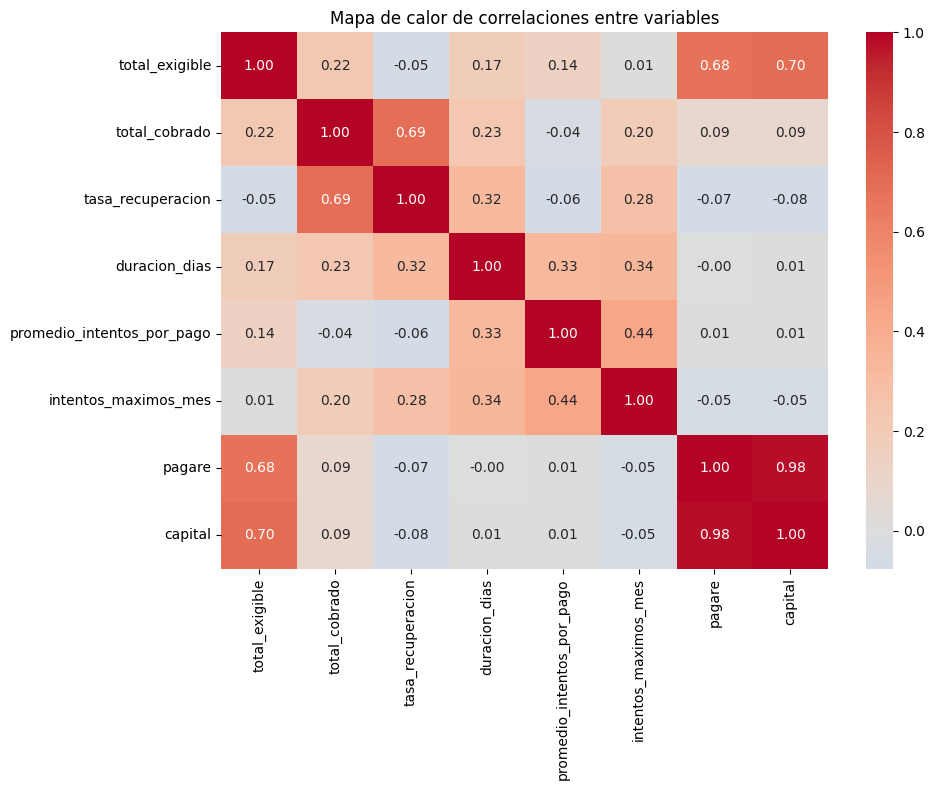

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Mapa de calor de correlaciones entre variables")
plt.tight_layout()
plt.show()


In [ ]:
df_cluster = df_cluster.drop(columns=["capital"])


In [ ]:
X_scaled_df = X_scaled_df.drop(columns=["capital"])


In [ ]:
# Total de registros
total_filas = X_scaled_df.shape[0]

# Registros con al menos un NaN
filas_con_nan = X_scaled_df.isna().any(axis=1).sum()

# Registros que conservarías si eliminas los NaN
filas_sin_nan = total_filas - filas_con_nan

# Porcentaje de pérdida
porcentaje_perdido = (filas_con_nan / total_filas) * 100

print(f"Total de filas: {total_filas}")
print(f"Filas con al menos un NaN: {filas_con_nan}")
print(f"Filas que conservarías: {filas_sin_nan}")
print(f"Pérdida de datos: {porcentaje_perdido:.2f}%")



Total de filas: 97230
Filas con al menos un NaN: 2
Filas que conservarías: 97228
Pérdida de datos: 0.00%


In [ ]:
X_scaled_df = X_scaled_df.dropna()


In [ ]:
df_cluster_clean = df_cluster.loc[X_scaled_df.index].copy()


In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Convertir a DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=X_scaled_df.index)


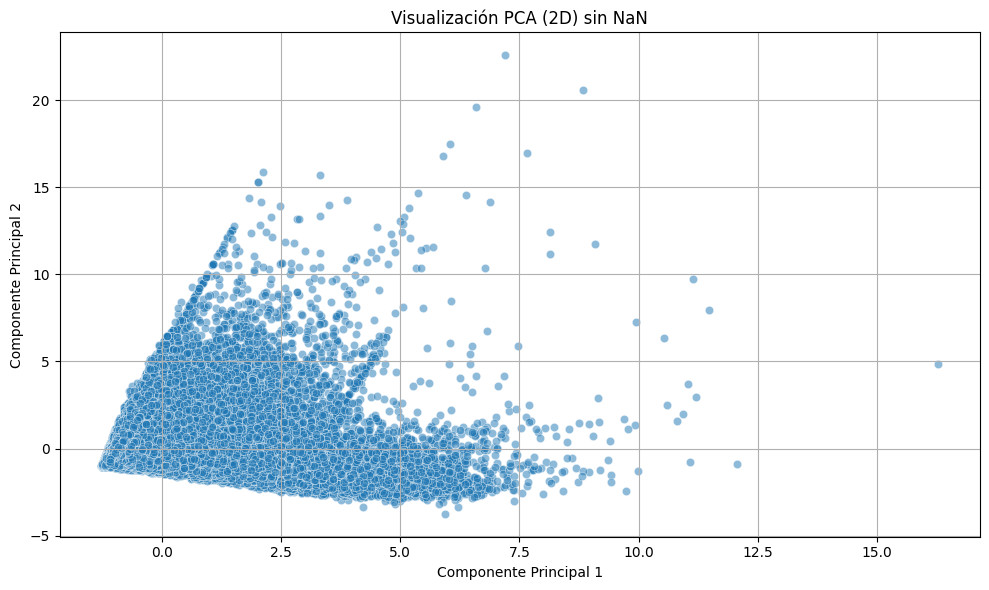

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca, alpha=0.5)
plt.title("Visualización PCA (2D) sin NaN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


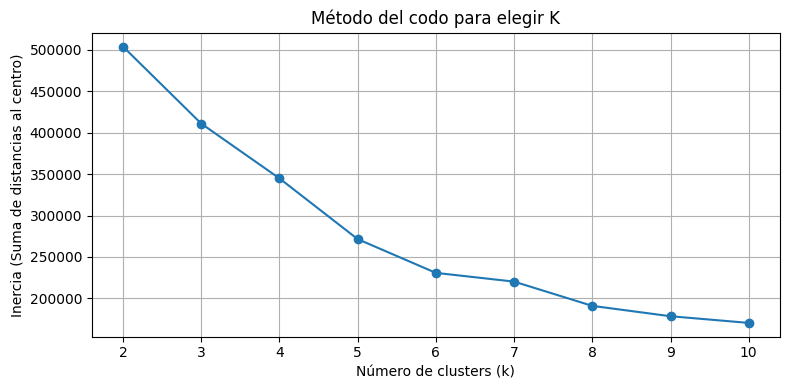

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Probar diferentes cantidades de clusters
inertias = []
K_range = range(2, 11)  # Puedes ampliar si quieres

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertias.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker="o")
plt.title("Método del codo para elegir K")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de distancias al centro)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Entrenar el modelo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled_df)

# Obtener etiquetas y agregarlas al DataFrame original
df_cluster_clean = df_cluster.loc[X_scaled_df.index].copy()
df_cluster_clean["cluster"] = kmeans.labels_

# También agregamos al DataFrame PCA para graficar
df_pca["cluster"] = kmeans.labels_


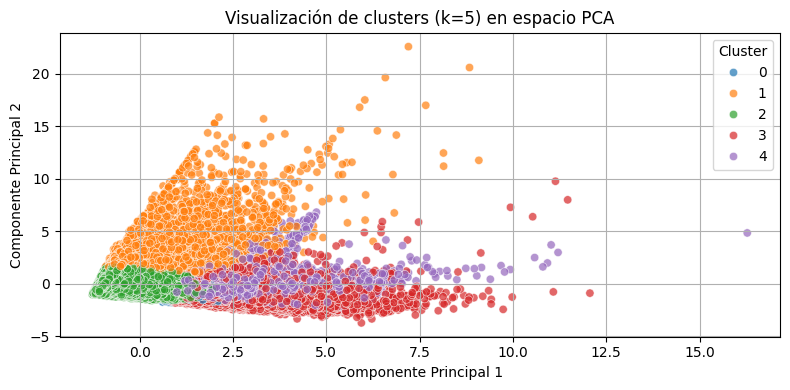

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("Visualización de clusters (k=5) en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_cluster_clean.groupby("cluster").mean()



,idCredito,total_exigible,total_cobrado,banco_principal,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,pagare,respuesta_moda_00,...,emisora_moda_34,emisora_moda_36,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79
cluster,,,,,,,,,,,,,,,,,,,,,
0,530612.933601,1191.358904,2018.384873,29.724248,2.138022,531.846574,30.478691,15.189582,54261.873486,0.005913,...,0.022479,0.060621,0.000271,0.000000,0.003747,0.004740,0.058725,0.008396,0.000000,0.051458
1,559106.785155,4508.798923,2915.652313,28.991236,0.766730,248.337937,28.115484,9.588501,246891.158476,0.010623,...,0.022706,0.041429,0.000000,0.000000,0.001593,0.000929,0.024963,0.000531,0.000133,0.043155
2,547364.812160,901.018471,798.242949,27.296758,0.941788,55.331776,6.102164,4.879737,55202.363094,0.029030,...,0.003670,0.023919,0.000211,0.000018,0.002546,0.011538,0.025745,0.001054,0.000105,0.041639
3,671880.252735,1288.906046,27148.470509,30.015873,23.118392,453.438434,8.467731,47.897057,59630.807070,0.001849,...,0.001695,0.009092,0.000000,0.000000,0.000308,0.000000,0.007089,0.000154,0.000000,0.005856
4,559902.585117,1491.487213,3967.532804,6.562257,3.893210,594.406128,337.349148,194.533074,55137.428660,0.000000,...,0.000000,0.311284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_cluster_clean["cluster"].value_counts()

,count
cluster,
2,56942
0,22154
1,7531
3,6489
4,4112


In [ ]:
resumen_clusters = df_cluster_clean.groupby("cluster").mean()


In [ ]:
resumen_clusters.to_csv("resumen_clusters.csv")
from google.colab import files
files.download("resumen_clusters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Identificar columnas dummies (respuesta_moda_ o emisora_moda_)
dummies = [col for col in resumen_clusters.columns if "respuesta_moda_" in col or "emisora_moda_" in col]

# Calcular la variabilidad (máx - mín) por columna
variabilidad = resumen_clusters[dummies].max() - resumen_clusters[dummies].min()

# Filtrar columnas útiles (variabilidad > 0.02)
dummies_importantes = variabilidad[variabilidad > 0.02].index.tolist()

# Crear tabla resumen
dummy_summary = pd.DataFrame({
    "variabilidad": variabilidad,
    "mantener": variabilidad > 0.02
}).sort_values(by="variabilidad", ascending=False)

# Ver las más útiles primero
dummy_summary

,variabilidad,mantener
respuesta_moda_4.0,0.428290,True
respuesta_moda_nan,0.314104,True
emisora_moda_9,0.276812,True
emisora_moda_12,0.229183,True
emisora_moda_6,0.149841,True
...,...,...
respuesta_moda_6.0,0.000030,False
respuesta_moda_88,0.000015,False
respuesta_moda_53,0.000015,False
emisora_moda_16,0.000015,False


In [ ]:

# Detectar columnas dummy
dummies = [col for col in resumen_clusters.columns if "respuesta_moda_" in col or "emisora_moda_" in col]

# Calcular variabilidad por columna dummy
variabilidad = resumen_clusters[dummies].max() - resumen_clusters[dummies].min()

# Criterios automáticos
umbral_media = variabilidad.mean()
umbral_p75 = variabilidad.quantile(0.75)
umbral_std = variabilidad.std()

# Evaluación múltiple
dummy_summary = pd.DataFrame({
    "variabilidad": variabilidad,
    "mantener_media": variabilidad > umbral_media,
    "mantener_p75": variabilidad > umbral_p75,
    "mantener_std": variabilidad > umbral_std
}).sort_values(by="variabilidad", ascending=False)

# Mostrar resumen
dummy_summary


,variabilidad,mantener_media,mantener_p75,mantener_std
respuesta_moda_4.0,0.674170,True,True,True
respuesta_moda_nan,0.375189,True,True,True
emisora_moda_9,0.341470,True,True,True
emisora_moda_6,0.303370,True,True,True
emisora_moda_36,0.302192,True,True,True
...,...,...,...,...
respuesta_moda_88,0.000045,False,False,False
respuesta_moda_6.0,0.000035,False,False,False
respuesta_moda_53,0.000018,False,False,False
emisora_moda_16,0.000018,False,False,False


In [ ]:
# Conteo de True y False por criterio
conteo = dummy_summary[["mantener_media", "mantener_p75", "mantener_std"]].apply(pd.Series.value_counts)

# Rellenar con 0 si falta algún valor
conteo = conteo.fillna(0).astype(int)

# Mostrar el conteo
print("Conteo de columnas seleccionadas por criterio:")
print(conteo)


Conteo de columnas seleccionadas por criterio:
       mantener_media  mantener_p75  mantener_std
False              51            48            56
True               13            16             8


In [ ]:
# Suponiendo que ya tienes dummy_summary calculado con las columnas anteriores
dummies_importantes = dummy_summary[dummy_summary["mantener_p75"]].index.tolist()


In [ ]:
df_cluster

,idCredito,total_exigible,total_cobrado,banco_principal,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,pagare,respuesta_moda_00,...,emisora_moda_34,emisora_moda_36,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79
0,6,375.47,0.00,2,0.0,293,2.0,1,27033.84,False,...,False,False,False,False,False,False,False,False,False,False
1,560,572.44,0.00,2,0.0,0,1.0,1,27477.12,False,...,False,False,False,False,False,False,False,False,False,False
2,773,391.12,0.00,14,0.0,0,2.0,2,28160.64,False,...,False,False,False,False,False,False,False,False,False,False
3,1154,92.73,0.00,14,0.0,0,2.0,2,6676.56,False,...,False,False,False,False,False,False,False,False,False,False
4,1315,375.47,0.00,14,0.0,0,2.0,2,27033.84,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,755683,585.33,585.33,12,1.0,0,0.0,0,28095.84,False,...,False,False,False,False,False,False,False,False,False,False
97226,755695,2654.48,2654.48,14,1.0,0,0.0,0,127415.04,False,...,False,False,False,False,False,False,False,False,False,False
97227,755726,3149.99,3149.99,12,1.0,0,0.0,0,163799.48,False,...,False,False,False,False,False,False,False,False,False,False
97228,755859,2928.79,0.00,2,0.0,3,16.0,16,152297.08,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

# Suponiendo que ya tienes dummy_summary calculado con las columnas anteriores

dummies_no_utiles = dummy_summary[dummy_summary["mantener_p75"] == False].index.tolist()

# 2. Lista de columnas a eliminar
columnas_a_eliminar = dummies_no_utiles + ["idCredito"]  # puedes añadir otras si deseas

# 3. Filtrar del DataFrame original
df_cluster_limpio = df_cluster.drop(columns=columnas_a_eliminar, errors="ignore")

# 4. Verifica las columnas finales
print("Columnas restantes para clustering:", df_cluster_limpio.columns.tolist())


Columnas restantes para clustering: ['total_exigible', 'total_cobrado', 'banco_principal', 'tasa_recuperacion', 'duracion_dias', 'promedio_intentos_por_pago', 'intentos_maximos_mes', 'pagare', 'respuesta_moda_04', 'respuesta_moda_26.0', 'respuesta_moda_4.0', 'respuesta_moda_nan', 'emisora_moda_5', 'emisora_moda_6', 'emisora_moda_7', 'emisora_moda_9', 'emisora_moda_10', 'emisora_moda_12', 'emisora_moda_13', 'emisora_moda_20', 'emisora_moda_25', 'emisora_moda_36', 'emisora_moda_68', 'emisora_moda_79']


In [ ]:
columnas_a_escalar = [
    "total_exigible", "total_cobrado", "tasa_recuperacion", "duracion_dias",
    "promedio_intentos_por_pago", "intentos_maximos_mes", "pagare"
]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_limpio[columnas_a_escalar])

# Convertir a DataFrame con nombres de columna
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_a_escalar, index=df_cluster_limpio.index)


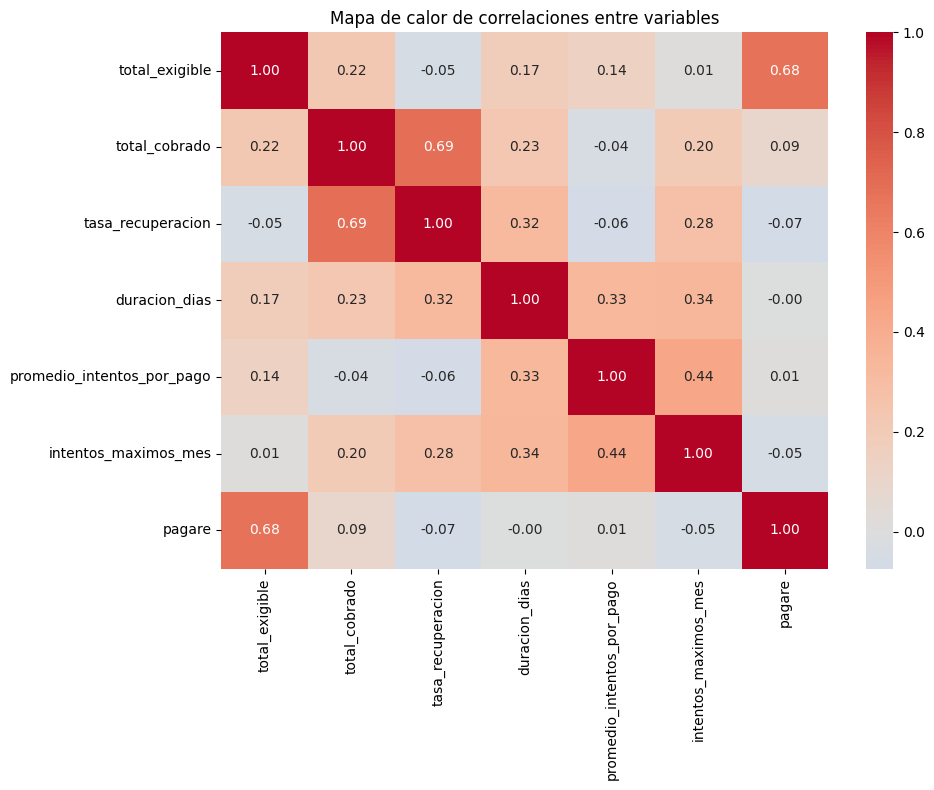

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Mapa de calor de correlaciones entre variables")
plt.tight_layout()
plt.show()

In [ ]:
X_scaled_df = X_scaled_df.dropna()

In [ ]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Convertir a DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=X_scaled_df.index)

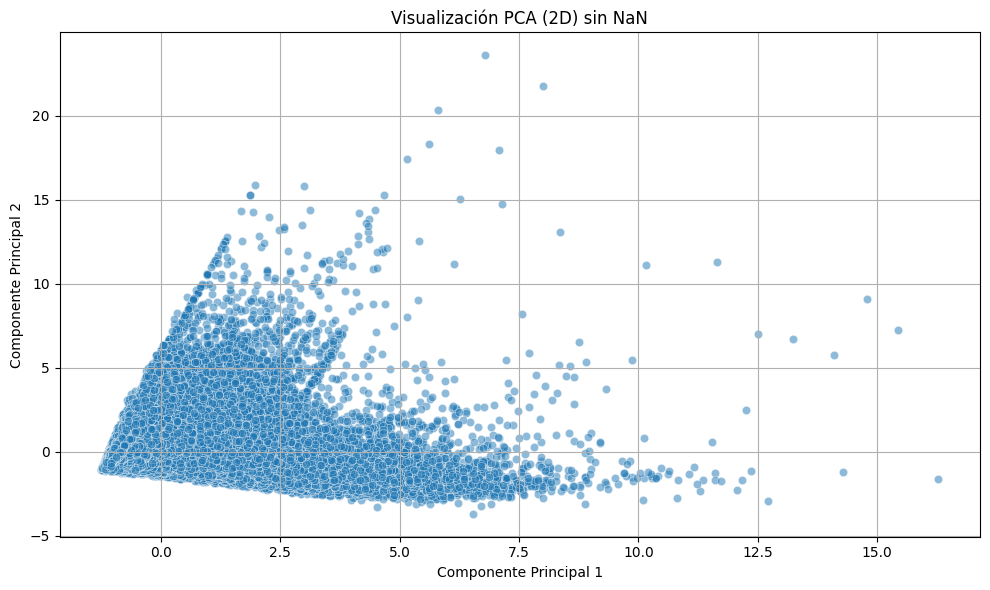

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_pca, alpha=0.5)
plt.title("Visualización PCA (2D) sin NaN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

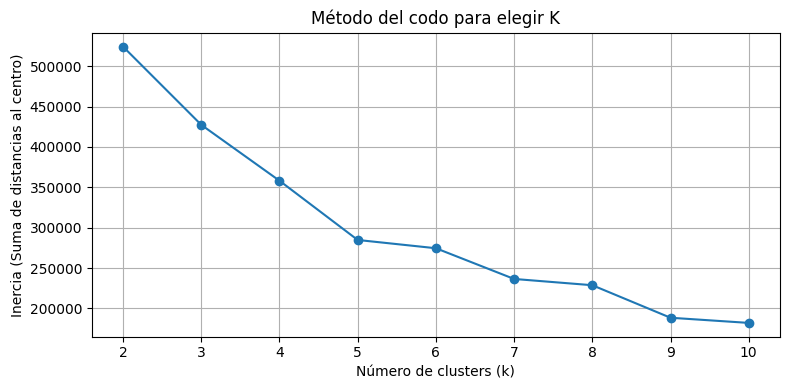

In [ ]:


# Probar diferentes cantidades de clusters
inertias = []
K_range = range(2, 11)  # Puedes ampliar si quieres

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertias.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker="o")
plt.title("Método del codo para elegir K")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de distancias al centro)")
plt.grid(True)
plt.tight_layout()

plt.show()

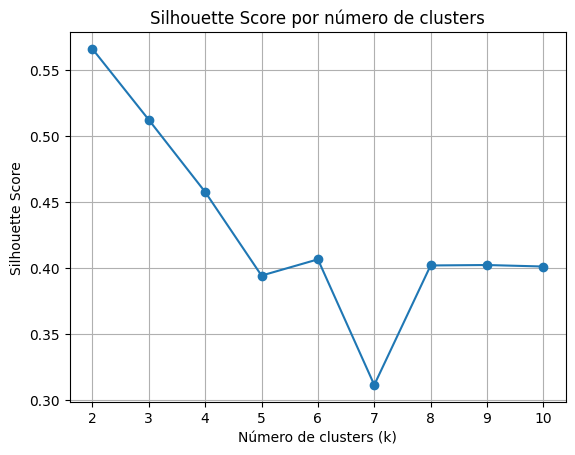

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    scores.append(score)

# Graficar Silhouette Score
plt.plot(range(2, 11), scores, marker='o')
plt.title("Silhouette Score por número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [ ]:
# Entrenar el modelo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled_df)

# Obtener etiquetas y agregarlas al DataFrame original
df_cluster_limpio = df_cluster.loc[X_scaled_df.index].copy()
df_cluster_limpio["cluster"] = kmeans.labels_

# También agregamos al DataFrame PCA para graficar
df_pca["cluster"] = kmeans.labels_


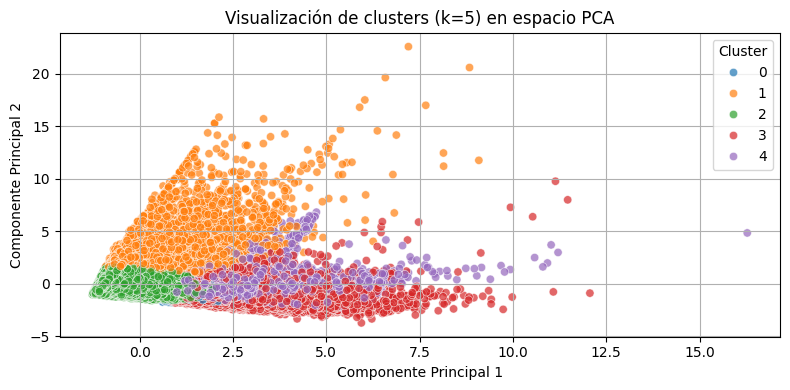

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("Visualización de clusters (k=5) en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_cluster_limpio.groupby("cluster").mean()

,idCredito,total_exigible,total_cobrado,banco_principal,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,pagare,respuesta_moda_00,...,emisora_moda_34,emisora_moda_36,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79
cluster,,,,,,,,,,,,,,,,,,,,,
0,532990.209295,1322.740616,2272.883697,22.582995,2.303503,630.556112,120.732872,62.837180,52153.840382,0.001902,...,0.025425,0.147920,0.000000,0.000000,0.000317,0.001522,0.039247,0.002980,0.000000,0.016104
1,545356.641861,907.940879,921.787670,27.905456,1.117238,104.634530,6.828339,5.148666,54706.894562,0.026331,...,0.004396,0.024208,0.000271,0.000015,0.003312,0.011065,0.031961,0.002951,0.000090,0.048552
2,557815.309264,4427.499488,2682.019770,29.514491,0.736918,259.771613,30.244372,9.345306,239940.466204,0.010528,...,0.022789,0.043721,0.000000,0.000000,0.001734,0.001239,0.025514,0.000867,0.000124,0.043597
3,669896.189566,1326.914276,26714.023084,29.442656,22.463244,459.507473,10.721669,55.876689,61045.813982,0.001725,...,0.001725,0.008911,0.000000,0.000000,0.000431,0.000000,0.007617,0.000144,0.000000,0.006180


In [ ]:

df_cluster_clean["cluster"].value_counts()

,count
cluster,
2,56942
0,22154
1,7531
3,6489
4,4112


In [ ]:
resumen_clusters = df_cluster_clean.groupby("cluster").mean()


In [ ]:
resumen_clusters.to_csv("resumen_clusters.csv")
from google.colab import files
files.download("resumen_clusters.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KMedoidsy HDBSCAN

In [ ]:
from sklearn.utils import resample

# Tomar una muestra de 10,000 registros
X_sample = resample(X_scaled_df, n_samples=10000, random_state=42)


In [ ]:
from sklearn.cluster import MiniBatchKMeans

mbkmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1024)
labels_mbk = mbkmeans.fit_predict(X_scaled_df)


In [ ]:
!pip install hdbscan

import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=500)
labels_hdb = clusterer.fit_predict(X_sample)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


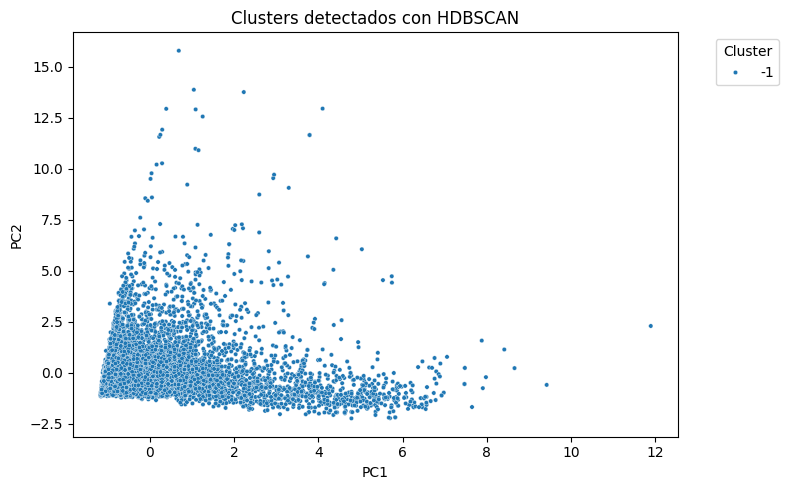

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA para visualización
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_sample)

# Graficar HDBSCAN
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], hue=labels_hdb, palette="tab10", s=10)
plt.title("Clusters detectados con HDBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

# Asumiendo que X_scaled_df es tu DataFrame escalado completo
X_sample = resample(X_scaled_df, n_samples=10000, random_state=42)


In [ ]:
import numpy as np
np.unique(labels_hdb, return_counts=True)


In [ ]:
# 3. Filtrar del DataFrame original
df_cluster_limpio = df_cluster.drop(columns=columnas_a_eliminar, errors="ignore")

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_limpio[columnas_a_escalar])

# Convertir a DataFrame con nombres de columna
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_a_escalar, index=df_cluster_limpio.index)


In [ ]:
X_scaled_df = X_scaled_df.dropna()

In [ ]:
# Entrenar el modelo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled_df)

# Obtener etiquetas y agregarlas al DataFrame original
df_cluster_clean = df_cluster.loc[X_scaled_df.index].copy()
df_cluster_clean["cluster"] = kmeans.labels_

# También agregamos al DataFrame PCA para graficar
df_pca["cluster"] = kmeans.labels_

In [ ]:
df_cluster_clean.groupby("cluster").mean()


,idCredito,total_exigible,total_cobrado,banco_principal,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,pagare,respuesta_moda_00,...,emisora_moda_34,emisora_moda_36,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79
cluster,,,,,,,,,,,,,,,,,,,,,
0,531954.192418,1337.303956,2214.500850,22.549184,2.176445,630.608814,121.326011,62.104528,52497.633248,0.001905,...,0.025719,0.149044,0.000000,0.000000,0.000318,0.001524,0.039754,0.002921,0.000000,0.016448
1,558584.007994,4407.340697,2873.281085,29.493789,0.778995,257.165047,29.233589,9.288771,240189.269627,0.010331,...,0.022383,0.042430,0.000000,0.000000,0.001722,0.001107,0.025458,0.000861,0.000123,0.043660
2,545269.740057,908.910549,919.663414,27.911349,1.099429,103.969347,6.804241,5.138692,54639.163844,0.026410,...,0.004349,0.024114,0.000272,0.000015,0.003322,0.011113,0.031845,0.002975,0.000091,0.048516
3,669071.674902,1272.249825,26034.183529,29.418866,22.371437,460.884896,10.909908,56.640230,58992.811047,0.001825,...,0.001965,0.009405,0.000000,0.000000,0.000421,0.000000,0.008282,0.000140,0.000000,0.006597


In [ ]:
# Identificar columnas dummies (respuesta_moda_ o emisora_moda_)
dummies = [col for col in resumen_clusters.columns if "respuesta_moda_" in col or "emisora_moda_" in col]

# Calcular la variabilidad (máx - mín) por columna
variabilidad = resumen_clusters[dummies].max() - resumen_clusters[dummies].min()

# Filtrar columnas útiles (variabilidad > 0.02)
dummies_importantes = variabilidad[variabilidad > 0.02].index.tolist()

# Crear tabla resumen
dummy_summary = pd.DataFrame({
    "variabilidad": variabilidad,
    "mantener": variabilidad > 0.02
}).sort_values(by="variabilidad", ascending=False)

# Ver las más útiles primero
dummy_summary

,variabilidad,mantener
respuesta_moda_4.0,0.428290,True
respuesta_moda_nan,0.314104,True
emisora_moda_9,0.276812,True
emisora_moda_12,0.229183,True
emisora_moda_6,0.149841,True
...,...,...
respuesta_moda_6.0,0.000030,False
respuesta_moda_88,0.000015,False
respuesta_moda_53,0.000015,False
emisora_moda_16,0.000015,False


In [ ]:

# Detectar columnas dummy
dummies = [col for col in resumen_clusters.columns if "respuesta_moda_" in col or "emisora_moda_" in col]

# Calcular variabilidad por columna dummy
variabilidad = resumen_clusters[dummies].max() - resumen_clusters[dummies].min()

# Criterios automáticos
umbral_media = variabilidad.mean()
umbral_p75 = variabilidad.quantile(0.75)
umbral_std = variabilidad.std()

# Evaluación múltiple
dummy_summary = pd.DataFrame({
    "variabilidad": variabilidad,
    "mantener_media": variabilidad > umbral_media,
    "mantener_p75": variabilidad > umbral_p75,
    "mantener_std": variabilidad > umbral_std
}).sort_values(by="variabilidad", ascending=False)

# Mostrar resumen
dummy_summary

,variabilidad,mantener_media,mantener_p75,mantener_std
respuesta_moda_4.0,0.428290,True,True,True
respuesta_moda_nan,0.314104,True,True,True
emisora_moda_9,0.276812,True,True,True
emisora_moda_12,0.229183,True,True,True
emisora_moda_6,0.149841,True,True,True
...,...,...,...,...
respuesta_moda_6.0,0.000030,False,False,False
respuesta_moda_88,0.000015,False,False,False
respuesta_moda_53,0.000015,False,False,False
emisora_moda_16,0.000015,False,False,False


In [ ]:

# Detectar columnas dummy
dummies = [col for col in resumen_clusters.columns if "respuesta_moda_" in col or "emisora_moda_" in col]

# Calcular variabilidad por columna dummy
variabilidad = resumen_clusters[dummies].max() - resumen_clusters[dummies].min()

# Criterios automáticos
umbral_media = variabilidad.mean()
umbral_p75 = variabilidad.quantile(0.75)
umbral_std = variabilidad.std()

# Evaluación múltiple
dummy_summary = pd.DataFrame({
    "variabilidad": variabilidad,
    "mantener_media": variabilidad > umbral_media,
    "mantener_p75": variabilidad > umbral_p75,
    "mantener_std": variabilidad > umbral_std
}).sort_values(by="variabilidad", ascending=False)

# Mostrar resumen
dummy_summary


,variabilidad,mantener_media,mantener_p75,mantener_std
respuesta_moda_4.0,0.428290,True,True,True
respuesta_moda_nan,0.314104,True,True,True
emisora_moda_9,0.276812,True,True,True
emisora_moda_12,0.229183,True,True,True
emisora_moda_6,0.149841,True,True,True
...,...,...,...,...
respuesta_moda_6.0,0.000030,False,False,False
respuesta_moda_88,0.000015,False,False,False
respuesta_moda_53,0.000015,False,False,False
emisora_moda_16,0.000015,False,False,False


In [ ]:

# Suponiendo que ya tienes dummy_summary calculado con las columnas anteriores

dummies_no_utiles = dummy_summary[dummy_summary["mantener_p75"] == False].index.tolist()

# 2. Lista de columnas a eliminar
columnas_a_eliminar = dummies_no_utiles + ["idCredito"]  # puedes añadir otras si deseas

# 3. Filtrar del DataFrame original
df_cluster_limpio = df_cluster.drop(columns=columnas_a_eliminar, errors="ignore")

# 4. Verifica las columnas finales
print("Columnas restantes para clustering:", df_cluster_limpio.columns.tolist())

Columnas restantes para clustering: ['total_exigible', 'total_cobrado', 'banco_principal', 'tasa_recuperacion', 'duracion_dias', 'promedio_intentos_por_pago', 'intentos_maximos_mes', 'pagare', 'respuesta_moda_04', 'respuesta_moda_26.0', 'respuesta_moda_4.0', 'respuesta_moda_nan', 'emisora_moda_5', 'emisora_moda_6', 'emisora_moda_7', 'emisora_moda_9', 'emisora_moda_10', 'emisora_moda_12', 'emisora_moda_13', 'emisora_moda_20', 'emisora_moda_25', 'emisora_moda_36', 'emisora_moda_68', 'emisora_moda_79']


In [ ]:
columnas_a_escalar = [
    "total_exigible", "total_cobrado", "tasa_recuperacion", "duracion_dias",
    "promedio_intentos_por_pago", "intentos_maximos_mes", "pagare"
]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_limpio[columnas_a_escalar])

# Convertir a DataFrame con nombres de columna
X_scaled_df = pd.DataFrame(X_scaled, columns=columnas_a_escalar, index=df_cluster_limpio.index)

In [ ]:
X_scaled_df = X_scaled_df.dropna()


In [ ]:
# Entrenar el modelo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled_df)

# Obtener etiquetas y agregarlas al DataFrame original
df_cluster_limpio = df_cluster.loc[X_scaled_df.index].copy()
df_cluster_limpio["cluster"] = kmeans.labels_

# También agregamos al DataFrame PCA para graficar
df_pca["cluster"] = kmeans.labels_

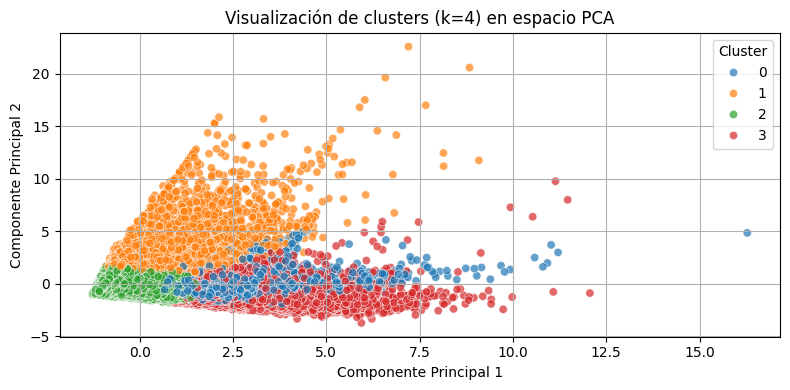

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("Visualización de clusters (k=4) en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_cluster_limpio.drop(columns=["idCredito","banco_principal"], inplace=True)
df_cluster_limpio.groupby("cluster").mean()


,total_exigible,total_cobrado,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,pagare,respuesta_moda_00,respuesta_moda_01,respuesta_moda_02,...,emisora_moda_34,emisora_moda_36,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79
cluster,,,,,,,,,,,,,,,,,,,,,
0,1322.740616,2272.883697,2.303503,630.556112,120.732872,62.837180,52153.840382,0.001902,0.000000,0.000254,...,0.025425,0.147920,0.000000,0.000000,0.000317,0.001522,0.039247,0.002980,0.000000,0.016104
1,907.940879,921.787670,1.117238,104.634530,6.828339,5.148666,54706.894562,0.026331,0.001039,0.001611,...,0.004396,0.024208,0.000271,0.000015,0.003312,0.011065,0.031961,0.002951,0.000090,0.048552
2,4427.499488,2682.019770,0.736918,259.771613,30.244372,9.345306,239940.466204,0.010528,0.001982,0.000743,...,0.022789,0.043721,0.000000,0.000000,0.001734,0.001239,0.025514,0.000867,0.000124,0.043597
3,1326.914276,26714.023084,22.463244,459.507473,10.721669,55.876689,61045.813982,0.001725,0.000000,0.000000,...,0.001725,0.008911,0.000000,0.000000,0.000431,0.000000,0.007617,0.000144,0.000000,0.006180


In [ ]:
df_cluster_limpio["cluster"].value_counts()

,count
cluster,
1,66424
0,15772
2,8074
3,6958


In [ ]:
resumen_clusters = df_cluster_limpio.groupby("cluster").mean()
resumen_clusters.to_csv("resumen_clusters.csv")
from google.colab import files
files.download("resumen_clusters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
etiquetas = {
    0: "Pagan pero requieren muchos intentos",
    1: "Cumplidos y rápidos",
    2: "Difíciles de recuperar",
    3: "Montos grandes con complejidad media"
}
df_cluster_limpio["etiqueta_cluster"] = df_cluster_limpio["cluster"].map(etiquetas)


In [ ]:
df_cluster_limpio

,total_exigible,total_cobrado,tasa_recuperacion,duracion_dias,promedio_intentos_por_pago,intentos_maximos_mes,pagare,respuesta_moda_00,respuesta_moda_01,respuesta_moda_02,...,emisora_moda_51,emisora_moda_54,emisora_moda_62,emisora_moda_67,emisora_moda_68,emisora_moda_75,emisora_moda_78,emisora_moda_79,cluster,etiqueta_cluster
0,375.47,0.00,0.0,293,2.0,1,27033.84,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
1,572.44,0.00,0.0,0,1.0,1,27477.12,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
2,391.12,0.00,0.0,0,2.0,2,28160.64,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
3,92.73,0.00,0.0,0,2.0,2,6676.56,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
4,375.47,0.00,0.0,0,2.0,2,27033.84,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,585.33,585.33,1.0,0,0.0,0,28095.84,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
97226,2654.48,2654.48,1.0,0,0.0,0,127415.04,False,False,False,...,False,False,False,False,False,False,False,False,1,Cumplidos y rápidos
97227,3149.99,3149.99,1.0,0,0.0,0,163799.48,False,False,False,...,False,False,False,False,False,False,False,False,2,Difíciles de recuperar
97228,2928.79,0.00,0.0,3,16.0,16,152297.08,False,False,False,...,False,False,False,False,False,False,False,False,2,Difíciles de recuperar


In [ ]:

# - knn_model ( modelo entrenado)
# - scaler
# - columnas_entrada (orden correcto de las features usadas)

def predecir_cluster(cliente_dict, knn_model, scaler, columnas_entrada):
    # Convertir a DataFrame
    df_cliente = pd.DataFrame([cliente_dict])[columnas_entrada]

    # Escalar si usaste scaler
    X_scaled = scaler.transform(df_cliente)

    # Predecir
    cluster = knn_model.predict(X_scaled)[0]
    return cluster


In [ ]:
# Guardar modelo de clustering
import joblib

joblib.dump(kmeans, "modelo_knn.pkl")


['modelo_kmeans_clusters.pkl']

In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
joblib.dump(columnas_a_escalar, "columnas.pkl")


['columnas.pkl']

In [ ]:
print("Columnas esperadas:", columnas)

Columnas esperadas: ['total_exigible', 'total_cobrado', 'tasa_recuperacion', 'duracion_dias', 'promedio_intentos_por_pago', 'intentos_maximos_mes', 'pagare']


#2

In [ ]:
import joblib
import pandas as pd

# Paso 1: Cargar modelo, scaler y columnas
kmeans = joblib.load("modelo_kmeans_clusters.pkl")
scaler = joblib.load("scaler.pkl")
columnas = joblib.load("columnas.pkl")
cliente_nuevo = {
    'total_exigible': 12000,
    'total_cobrado': 8000,
    'tasa_recuperacion': 0.666,
    'duracion_dias': 180,
    'promedio_intentos_por_pago': 3,
    'intentos_maximos_mes': 6,
    'pagare': 10000
}


In [ ]:
df_cliente = pd.DataFrame([cliente_nuevo])[columnas]
X_scaled_nuevo = scaler.transform(df_cliente)
cluster = kmeans.predict(X_scaled_nuevo)[0]
print("Este cliente pertenece al cluster:", cluster)


Este cliente pertenece al cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
ruta = "/content/drive/MyDrive/df_modelo_final.csv"
df = pd.read_csv(ruta)

In [ ]:
df

,Unnamed: 0,idEmisora,Nombre,IdBanco,Costo,respuesta_mismo_dia,proporcion_nans,efectividad_emisor
0,0,1,BANAMEX CLABE TRADICIONAL,2,1.750,True,0.003781,0.0250
1,1,2,BANAMEX CUENTA,2,1.750,True,0.003781,0.0600
2,2,3,BANAMEX TARJETA,2,1.750,True,0.003781,0.0010
3,3,4,BANAMEX INTERBANCARIO,2,1.750,False,0.003781,0.0005
4,4,5,BANAMEX TRADICIONAL REINTENTO,2,1.750,True,0.003781,0.0200
5,5,6,BBVA TRADICIONAL REINTENTO,12,8.000,False,0.003348,0.0000
6,6,7,BANORTE TRADICIONAL REINTENTO,72,2.500,True,0.244229,0.0015
7,7,8,SANTANDER TRADICIONAL REINTENTO,14,1.970,False,0.042595,0.0000
8,8,9,SANTANDER CLABE TRADICIONAL,14,2.820,False,0.042595,0.2900
9,9,10,SANTANDER CUENTA,14,2.820,False,0.042595,0.0400


#Maximizar utilidad neta esperada

In [ ]:
!pip install pulp
from pulp import *

df["urgencia"] = df["respuesta_mismo_dia"].apply(lambda x: 1.0 if x else 0.5)
valor_esperado = 1.0

prob_beneficio = LpProblem("Maximizar_Beneficio_Neto", LpMaximize)
x_b = LpVariable.dicts("Ruta", df["idEmisora"], cat="Binary")

prob_beneficio += lpSum([
    x_b[r] * (
        valor_esperado *
        df.loc[df["idEmisora"] == r, "efectividad_emisor"].values[0] *
        df.loc[df["idEmisora"] == r, "urgencia"].values[0]
        - df.loc[df["idEmisora"] == r, "Costo"].values[0]
    ) for r in df["idEmisora"]
])
prob_beneficio += lpSum([x_b[r] for r in df["idEmisora"]]) == 1
prob_beneficio.solve()
ruta_beneficio = df.loc[[x_b[r].value() == 1 for r in df["idEmisora"]], "Nombre"].values[0]


#Minimizar costo de comisiones

In [ ]:
prob_costo = LpProblem("Minimizar_Costo", LpMinimize)
x_c = LpVariable.dicts("RutaC", df["idEmisora"], cat="Binary")

prob_costo += lpSum([x_c[r] * df.loc[df["idEmisora"] == r, "Costo"].values[0] for r in df["idEmisora"]])
prob_costo += lpSum([x_c[r] for r in df["idEmisora"]]) == 1
prob_costo.solve()
ruta_costo = df.loc[[x_c[r].value() == 1 for r in df["idEmisora"]], "Nombre"].values[0]


# Maximizar cobranza esperada (penalizando NaNs y lentitud)

In [ ]:
alpha, beta, gamma = 1.0, 0.5, 1.5
prob_cobranza = LpProblem("Maximizar_Cobranza", LpMaximize)
x_e = LpVariable.dicts("RutaEf", df["idEmisora"], cat="Binary")

prob_cobranza += lpSum([
    x_e[r] * (
        alpha * df.loc[df["idEmisora"] == r, "efectividad_emisor"].values[0] +
        beta * df.loc[df["idEmisora"] == r, "urgencia"].values[0] -
        gamma * df.loc[df["idEmisora"] == r, "proporcion_nans"].values[0]
    ) for r in df["idEmisora"]
])
prob_cobranza += lpSum([x_e[r] for r in df["idEmisora"]]) == 1
prob_cobranza.solve()
ruta_cobranza = df.loc[[x_e[r].value() == 1 for r in df["idEmisora"]], "Nombre"].values[0]


In [ ]:
from pulp import LpVariable, LpProblem, lpSum, LpMaximize, LpMinimize

def obtener_mejor_ruta(df_modelo_final, modo):
    df = df_modelo_final.copy()
    df["urgencia"] = df["respuesta_mismo_dia"].apply(lambda x: 1.0 if x else 0.5)
    valor_esperado = 1.0
    x = LpVariable.dicts("Ruta", df["idEmisora"], cat="Binary")
    prob = LpProblem("Opt", LpMaximize if modo != "costo" else LpMinimize)

    if modo == "beneficio":
        prob += lpSum([
            x[r] * (
                valor_esperado *
                df.loc[df["idEmisora"] == r, "efectividad_emisor"].values[0] *
                df.loc[df["idEmisora"] == r, "urgencia"].values[0]
                - df.loc[df["idEmisora"] == r, "Costo"].values[0]
            ) for r in df["idEmisora"]
        ])
    elif modo == "costo":
        prob += lpSum([x[r] * df.loc[df["idEmisora"] == r, "Costo"].values[0] for r in df["idEmisora"]])
    elif modo == "cobranza":
        alpha, beta, gamma = 1.0, 0.5, 1.5
        prob += lpSum([
            x[r] * (
                alpha * df.loc[df["idEmisora"] == r, "efectividad_emisor"].values[0] +
                beta * df.loc[df["idEmisora"] == r, "urgencia"].values[0] -
                gamma * df.loc[df["idEmisora"] == r, "proporcion_nans"].values[0]
            ) for r in df["idEmisora"]
        ])

    prob += lpSum([x[r] for r in df["idEmisora"]]) == 1
    prob.solve()
    id_optimo = [r for r in df["idEmisora"] if x[r].value() == 1][0]
    return id_optimo


In [ ]:
df1.columns

Index(['Unnamed: 0', 'idListaCobro', 'idCredito', 'consecutivoCobro',
       'idBanco', 'montoExigible', 'montoCobrar', 'montoCobrado',
       'fechaCobroBanco', 'idRespuestaBanco', 'fechaCreacionLista',
       'idBanco_y', 'fechaEnvioCobro', 'idEmisora', 'horaCreacionLista',
       'Descripcion', 'Nombre', 'Emisora', 'TipoEnvio', 'Costo',
       'TiempoRespuesta', 'TiempoBusqueda', 'pagare', 'capital',
       'fechaAperturaCredito'],
      dtype='object')

In [ ]:
# Usar los datos reales del usuario en df1, y calcular costo_real con base en idEstrategia = idEmisora
df_historico = df1.copy()

# Agregar costo y efectividad reales
df_historico = df_historico.merge(
    df_modelo_final[["idEmisora", "Costo", "efectividad_emisor"]],
    on="idEmisora", how="left"
).rename(columns={
    "Costo_x": "costo_real",
    "efectividad_emisor": "efectividad_real"
})


In [ ]:
print(df_modelo_final.columns)


Index(['Unnamed: 0', 'idEmisora', 'Nombre', 'IdBanco', 'Costo',
       'respuesta_mismo_dia', 'proporcion_nans', 'efectividad_emisor'],
      dtype='object')


In [ ]:
print("Columnas en df1:", df1.columns)

Columnas en df1: Index(['Unnamed: 0', 'idListaCobro', 'idCredito', 'consecutivoCobro',
       'idBanco', 'montoExigible', 'montoCobrar', 'montoCobrado',
       'fechaCobroBanco', 'idRespuestaBanco', 'fechaCreacionLista',
       'idBanco_y', 'fechaEnvioCobro', 'idEmisora', 'horaCreacionLista',
       'Descripcion', 'Nombre', 'Emisora', 'TipoEnvio', 'Costo',
       'TiempoRespuesta', 'TiempoBusqueda', 'pagare', 'capital',
       'fechaAperturaCredito'],
      dtype='object')


In [ ]:
# Aseguramos que df1 esté copiado para no modificar el original
df_historico = df1.copy()

# Hacemos el merge con df_modelo_final para traer costo y efectividad
df_historico = df_historico.merge(
    df_modelo_final[["idEmisora", "Costo", "efectividad_emisor"]],
    on="idEmisora", how="left"
).rename(columns={
    "Costo_x": "costo_real",
    "efectividad_emisor": "efectividad_real"
})




In [ ]:
df_historico.head()

,Unnamed: 0,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,...,Emisora,TipoEnvio,costo_real,TiempoRespuesta,TiempoBusqueda,pagare,capital,fechaAperturaCredito,Costo_y,efectividad_real
0,0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,...,noAplica,CUENTA,1.75,30.0,30.0,44634.33,21000.0,30/12/2013,1.75,0.05
1,1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,...,noAplica,CUENTA,1.75,30.0,30.0,40383.33,19000.0,12/02/2014,1.75,0.05
2,2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,...,noAplica,CUENTA,1.75,30.0,30.0,53135.94,25000.0,19/02/2014,1.75,0.05
3,3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,...,noAplica,CUENTA,1.75,30.0,30.0,44634.33,21000.0,26/02/2014,1.75,0.05
4,4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,...,noAplica,CUENTA,1.75,30.0,30.0,26567.97,12500.0,21/03/2014,1.75,0.05


In [ ]:
import pandas as pd
import numpy as np
from pulp import LpVariable, LpProblem, lpSum, LpMaximize, LpMinimize


# Función para obtener mejor ruta por tipo de estrategia
def obtener_mejor_ruta(df_modelo_final, modo):
    df = df_modelo_final.copy()
    df["urgencia"] = df["respuesta_mismo_dia"].apply(lambda x: 1.0 if x else 0.5)
    valor_esperado = 1.0
    x = LpVariable.dicts("Ruta", df["idEmisora"], cat="Binary")
    prob = LpProblem("Opt", LpMaximize if modo != "costo" else LpMinimize)

    if modo == "beneficio":
        prob += lpSum([
            x[r] * (
                valor_esperado *
                df.loc[df["idEmisora"] == r, "efectividad_emisor"].values[0] *
                df.loc[df["idEmisora"] == r, "urgencia"].values[0]
                - df.loc[df["idEmisora"] == r, "Costo"].values[0]
            ) for r in df["idEmisora"]
        ])
    elif modo == "costo":
        prob += lpSum([
            x[r] * df.loc[df["idEmisora"] == r, "Costo"].values[0]
            for r in df["idEmisora"]
        ])
    elif modo == "cobranza":
        alpha, beta, gamma = 1.0, 0.5, 1.5
        prob += lpSum([
            x[r] * (
                alpha * df.loc[df["idEmisora"] == r, "efectividad_emisor"].values[0] +
                beta * df.loc[df["idEmisora"] == r, "urgencia"].values[0] -
                gamma * df.loc[df["idEmisora"] == r, "proporcion_nans"].values[0]
            ) for r in df["idEmisora"]
        ])
    prob += lpSum([x[r] for r in df["idEmisora"]]) == 1
    prob.solve()
    id_optimo = [r for r in df["idEmisora"] if x[r].value() == 1][0]
    return id_optimo

# Obtener la mejor ruta para cada estrategia
beneficio_optimo = obtener_mejor_ruta(df_modelo_final, "beneficio")
costo_optimo = obtener_mejor_ruta(df_modelo_final, "costo")
cobranza_optimo = obtener_mejor_ruta(df_modelo_final, "cobranza")

# Agregar las rutas óptimas al histórico
for modo, id_opt in zip(
    ["beneficio", "costo", "cobranza"],
    [beneficio_optimo, costo_optimo, cobranza_optimo]
):
    ruta = df_modelo_final[df_modelo_final["idEmisora"] == id_opt].iloc[0]
    df_historico[f"id_opt_{modo}"] = id_opt
    df_historico[f"costo_opt_{modo}"] = ruta["Costo"]
    df_historico[f"efectividad_opt_{modo}"] = ruta["efectividad_emisor"]

# Calcular impacto comparativo
df_historico["ahorro_costo"] = df_historico["costo_real"] - df_historico["costo_opt_costo"]
df_historico["ganancia_efectividad"] = df_historico["efectividad_opt_cobranza"] - df_historico["efectividad_real"]


print("Mejora total en efectividad:", df_historico["ganancia_efectividad"].sum())
print("Ahorro promedio por cliente:", df_historico["ahorro_costo"].mean())
print("Mejora promedio por cliente:", df_historico["ganancia_efectividad"].mean())

Mejora total en efectividad: 200513.30399999995
Ahorro promedio por cliente: 2.928064972725231
Mejora promedio por cliente: 0.01994842247298859


,costo_real,costo_opt_costo,ahorro_costo
count,1.005159e+07,1.005744e+07,1.005159e+07
mean,4.528065e+00,1.600000e+00,2.928065e+00
std,2.805312e+00,2.582956e-10,2.805312e+00
min,1.600000e+00,1.600000e+00,0.000000e+00
25%,1.750000e+00,1.600000e+00,1.500000e-01
50%,4.000000e+00,1.600000e+00,2.400000e+00
75%,8.000000e+00,1.600000e+00,6.400000e+00
max,8.000000e+00,1.600000e+00,6.400000e+00
